In [1]:
from model import FaceRec
from sklearn.datasets import fetch_lfw_people
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

In [3]:
CKPT_LOCATION = '/home/anshuman/Downloads/checkpoints/c2d_0.7_c1n_256_rs_1_c2s_6_c1nf_16_lr_0.0001_c1s_9_c2vl_32_c1vl_16_c2n_64_c1s_5--FaceRec--1522453379.5724702'

In [4]:
model = FaceRec("FaceRec", output_folder='/tmp')
model.load(CKPT_LOCATION)

ModelBase::Loading ckpt ...


'model_variables' collection should be of type 'byte_list', but instead is of type 'node_list'.


The saved meta_graph is possibly from an older release:
'model_variables' collection should be of type 'byte_list', but instead is of type 'node_list'.


INFO:tensorflow:Restoring parameters from /home/anshuman/Downloads/checkpoints/c2d_0.7_c1n_256_rs_1_c2s_6_c1nf_16_lr_0.0001_c1s_9_c2vl_32_c1vl_16_c2n_64_c1s_5--FaceRec--1522453379.5724702


Restoring parameters from /home/anshuman/Downloads/checkpoints/c2d_0.7_c1n_256_rs_1_c2s_6_c1nf_16_lr_0.0001_c1s_9_c2vl_32_c1vl_16_c2n_64_c1s_5--FaceRec--1522453379.5724702
ModelBase::Trying to load tensor params with str method
ModelBase::Ckpt ready


Type is unsupported, or the types of the items don't match field type in CollectionDef.
'Tensor' object has no attribute 'to_proto'


Error encountered when serializing model_variables.
Type is unsupported, or the types of the items don't match field type in CollectionDef.
'Tensor' object has no attribute 'to_proto'


In [5]:
people = fetch_lfw_people(color=True, min_faces_per_person=10)

In [11]:
def downsample_images(img):
    img = Image.fromarray(img.astype('uint8'), 'RGB')
    img = img.resize((32,32), Image.ANTIALIAS)
    return np.array(img)

def rotate_images(img, degree=180):
    img = img * 255
    img = Image.fromarray(img.astype('uint8'), 'RGB')
    img = img.rotate(degree)
    return np.array(img)/255

X_faces = people.images
Y_faces = people.target
target_names = people.target_names

X_faces = np.array([downsample_images(ab) for ab in X_faces])
X_faces = X_faces / 255

In [7]:
def get_top_5_prediction(image):
    softmax = model.predict(np.array([image]))
    top_5 = softmax.argsort()[0][-5:][::-1]
    top_5_names = [(target_names[i], softmax[0][i]) for i in top_5]
    return top_5_names

def print_top_5_prediction(image):
    top_5_names = get_top_5_prediction(image)
    print("\nPredicted Names and softmax score: ")
    for name in top_5_names:
        print("%s: %s" %(name[0], name[1]))

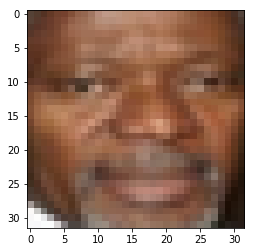

In [27]:
index = 789
image = X_faces[index]
plt.imshow(image)

In [30]:
get_top_5_prediction(image)

[('Kofi Annan', 0.013577576),
 ('Colin Powell', 0.007091102),
 ('Gordon Brown', 0.006623291),
 ('Paul Wolfowitz', 0.006596255),
 ('George W Bush', 0.0065621864)]

In [31]:
target_names[Y_faces[index]]

'Kofi Annan'

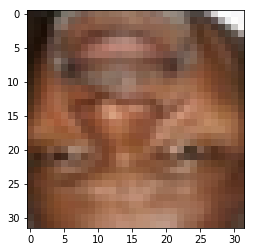

In [28]:
image_rotated = rotate_images(image)
plt.imshow(image_rotated)

In [29]:
get_top_5_prediction(image_rotated)

[('Ariel Sharon', 0.008331074),
 ('Vicente Fox', 0.008216689),
 ('Colin Powell', 0.0076630595),
 ('Kofi Annan', 0.007523494),
 ('Trent Lott', 0.0075001176)]